<a href="https://colab.research.google.com/github/PavicicJadranko/Digit-Recognizer-using-Machine-Learning/blob/main/Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# End-to-end Multi-class Digit Classificaton

In this notebook we'll try to make a ML model which correctly identify digits from a dataset of tens of thousands of handwritten images.



## 1. Problem
Identifying a digit given an image of a digit.

## 2. Data
The data we are using is from Kaggle's digit recognizer competition:
https://www.kaggle.com/competitions/digit-recognizer/overview

The data files, train.csv and test.csv, contain gray-scale images of hand-drawn digits, where each image has dimensions of 28x28 pixels, totaling 784 pixels. Each pixel value ranges from 0 to 255, indicating lightness or darkness.

## 3. Evaluation

The goal in this competition is to take an image of a handwritten single digit, and determine what that digit is.
For every in the test set, you should predict the correct label.

This competition is evaluated on the categorization accuracy of your predictions (the percentage of images you get correct).

## 4. Features

The train.csv file includes 785 columns, with the first column representing the digit label, while the remaining columns provide pixel values identified as pixelx (where x ranges from 0 to 783), mapped onto a 28x28 matrix according to specified indexing rules.

## Modeling

* Objective: Develop a machine learning model that accurately identifies handwritten digit images (0-9).

* Dataset: Utilize the MNIST dataset, which contains 70,000 images of handwritten digits.

* Preprocessing: Normalize the pixel values to improve model performance.
Reshape images to fit the input requirement of the model.
* Model Selection: Choose a suitable model architecture (e.g., Convolutional Neural Network) for better accuracy.
* Training: Split the dataset into training and test sets.
Train the model on the training set while validating performance on the test set.
* Evaluation Metrics: Use accuracy, confusion matrix, and F1-score to evaluate the model’s performance.

## Get our workspace ready

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras as tf_keras
from tf_keras.models import Sequential
from tf_keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D


In [11]:
# Load the data
train_df = pd.read_csv("/content/drive/MyDrive/Digit Recognizer/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Digit Recognizer/test.csv")
train_df.shape, test_df.shape

((42000, 785), (28000, 784))

In [12]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
X_train = train_df.drop('label', axis=1)
y_train = train_df['label']
X_train.shape, y_train.shape

((42000, 784), (42000,))

In [14]:
# Scale the pixel values from 0-255 to 0-1
X_train = X_train / 255.0
test_df = test_df / 255.0


In [15]:
# Reshape the training and test data to a 28x28 pixel image
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = test_df.values.reshape(-1, 28, 28, 1)

## Visualize the Data

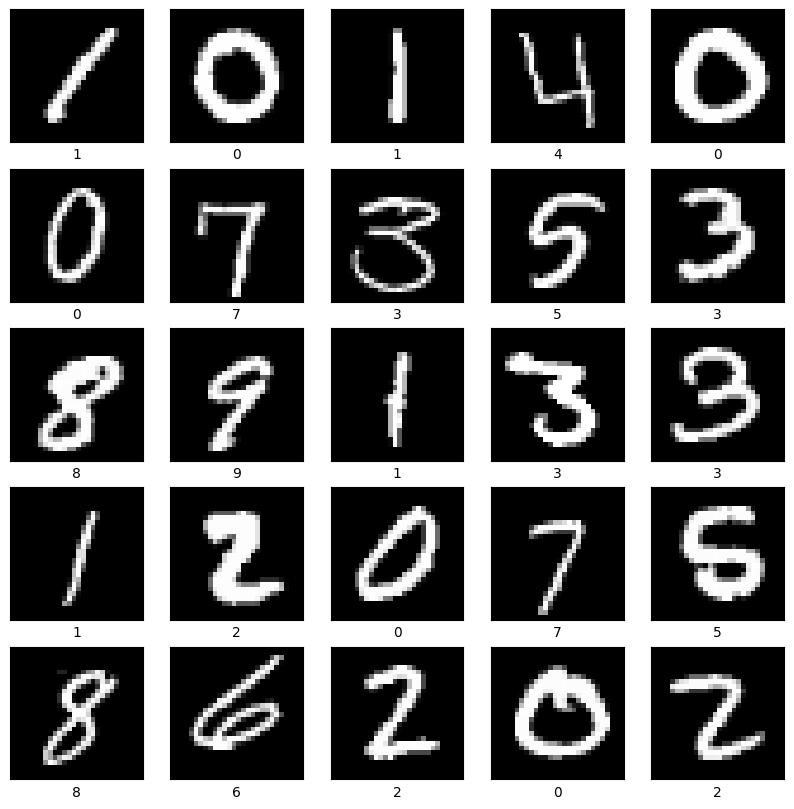

In [16]:
# Visualize the images in the train dataframe
%matplotlib inline
def img_show(size, img=X_train, label=y_train):
    plt.figure(figsize=(10, 10))
    for i in range(size):
        plt.subplot(5, 5, i+1)
        plt.imshow(img[i], cmap="grey")
        plt.xlabel(label[i])
        plt.xticks([])
        plt.yticks([])
    plt.show()

img_show(25)

## Building the model

In [2]:
model = tf_keras.Sequential([
    tf_keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf_keras.layers.Dense(128, activation='relu'),
    tf_keras.layers.Dense(10)
])

model.compile(optimizer= "adam",
              loss=tf_keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


model.build()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Training the model

In [18]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8617 - loss: 0.4871
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9583 - loss: 0.1415
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9737 - loss: 0.0880
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9793 - loss: 0.0672
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9853 - loss: 0.0500
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9882 - loss: 0.0382
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9915 - loss: 0.0292
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9942 - loss: 0.0226
Epoch 9/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9956 - loss: 0.0182
Epoch 10/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9960 - loss: 0.0158


### Making a prediction

In [19]:
probability_model = tf_keras.Sequential([model, tf_keras.layers.Softmax()])
predictions = probability_model.predict(X_test)

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [20]:
np.argmax(predictions[0])

np.int64(2)

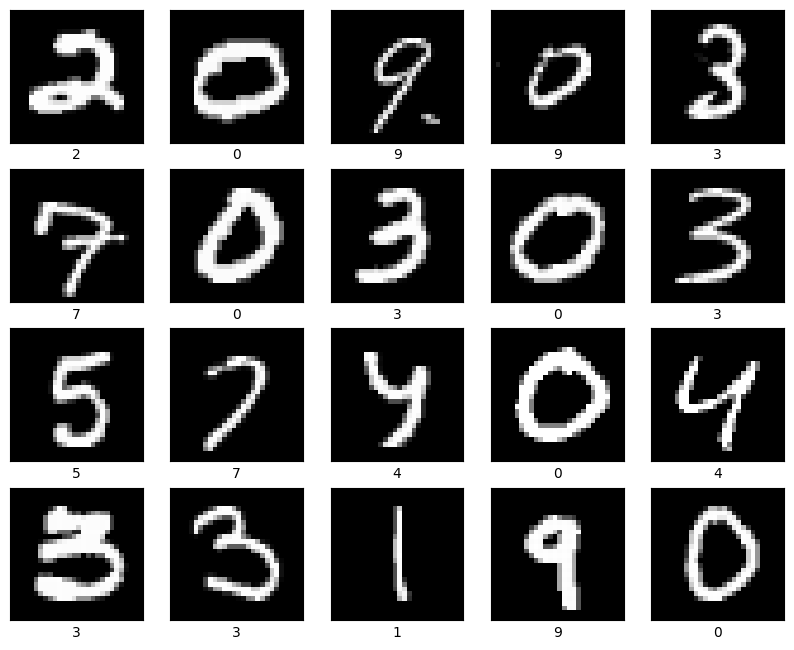

In [21]:
# Visualize the images in the train dataframe
img_show(20, img=X_test, label= np.argmax(predictions, axis=1))

### Submitting the predictions to Kaggle
### Prediction accuracy

We got a 97,35% accuracy which is not bad for our firs trial.

**Note:** Can we do better?

In [12]:
def submission(name):
    prediction_int = [int(np.argmax(pred)) for pred in predictions]
    img_id = np.arange(1, len(prediction_int)+1)
    submission = pd.DataFrame({'ImageId': img_id, 'Label': prediction_int})
    submission.to_csv(f'/content/drive/MyDrive/Digit Recognizer/{name}.csv', index=False)
submission("submissionV1")

## Model improvements

Lets try to improve our model by using some Hyperparameter tuning.


In [23]:
# Making a model builder function
%pip install keras-tuner
import keras_tuner as kt

def model_builder(hp):
    model = tf_keras.Sequential()

    model.add(tf_keras.layers.Flatten(input_shape=(28, 28,1)))

    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    model.add(tf_keras.layers.Dense(units=hp_units, activation='relu'))
    model.add(tf_keras.layers.Dense(10))

    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=tf_keras.optimizers.Adam(learning_rate=hp_learning_rate),
                    loss=tf_keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                        metrics=['accuracy'])


    return model

In [24]:
# Instantiate the tuner and perform hypertuning
tuner = kt.Hyperband(model_builder,
                        objective='val_accuracy',
                        max_epochs=10,
                        factor=3,
                        directory='my_dir',
                        project_name='intro_to_kt')

    # Create a callback
stop_early = tf_keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tuner.search(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

    # Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
    The hyperparameter search is complete. The optimal number of units: {best_hps.get('units')}
    optimal learning rate for the optimizer: {best_hps.get('learning_rate')}.
""")



Reloading Tuner from my_dir/intro_to_kt/tuner0.json

    The hyperparameter search is complete. The optimal number of units: 224
    optimal learning rate for the optimizer: 0.01.



### Training the improved model

In [25]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
def best_epoch():
    model = tuner.hypermodel.build(best_hps)
    history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

    val_acc_per_epoch = history.history['val_accuracy']
    best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
    print('Best epoch: %d' % (best_epoch,))
    return best_epoch

best_epoch = best_epoch()

Epoch 1/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8750 - loss: 0.4058 - val_accuracy: 0.9390 - val_loss: 0.1992
Epoch 2/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9506 - loss: 0.1708 - val_accuracy: 0.9492 - val_loss: 0.1963
Epoch 3/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9603 - loss: 0.1432 - val_accuracy: 0.9464 - val_loss: 0.2261
Epoch 4/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9647 - loss: 0.1249 - val_accuracy: 0.9526 - val_loss: 0.2136
Epoch 5/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9688 - loss: 0.1142 - val_accuracy: 0.9580 - val_loss: 0.1986
Epoch 6/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9734 - loss: 0.0939 - val_accuracy: 0.9519 - val_loss: 0.2201
Epoch 7/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9760 - loss: 0.0896 - val_accuracy: 0.9582 - val_loss: 0.2596
Epoch 8/50
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9758 - loss: 0.1004 - 

In [26]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
hypermodel.fit(X_train, y_train, epochs=best_epoch, validation_split=0.2)

Epoch 1/47
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8817 - loss: 0.3957 - val_accuracy: 0.9463 - val_loss: 0.1919
Epoch 2/47
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9523 - loss: 0.1729 - val_accuracy: 0.9539 - val_loss: 0.1743
Epoch 3/47
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9657 - loss: 0.1242 - val_accuracy: 0.9570 - val_loss: 0.1860
Epoch 4/47
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9676 - loss: 0.1199 - val_accuracy: 0.9449 - val_loss: 0.2577
Epoch 5/47
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9710 - loss: 0.1036 - val_accuracy: 0.9608 - val_loss: 0.1917
Epoch 6/47
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9710 - loss: 0.1059 - val_accuracy: 0.9565 - val_loss: 0.2252
Epoch 7/47
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9764 - loss: 0.0935 - val_accuracy: 0.9551 - val_loss: 0.2527
Epoch 8/47
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9782 - loss: 0.0796 - 

In [27]:
probability_model = tf_keras.Sequential([hypermodel, tf_keras.layers.Softmax()])
predictions = probability_model.predict(X_test)


875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


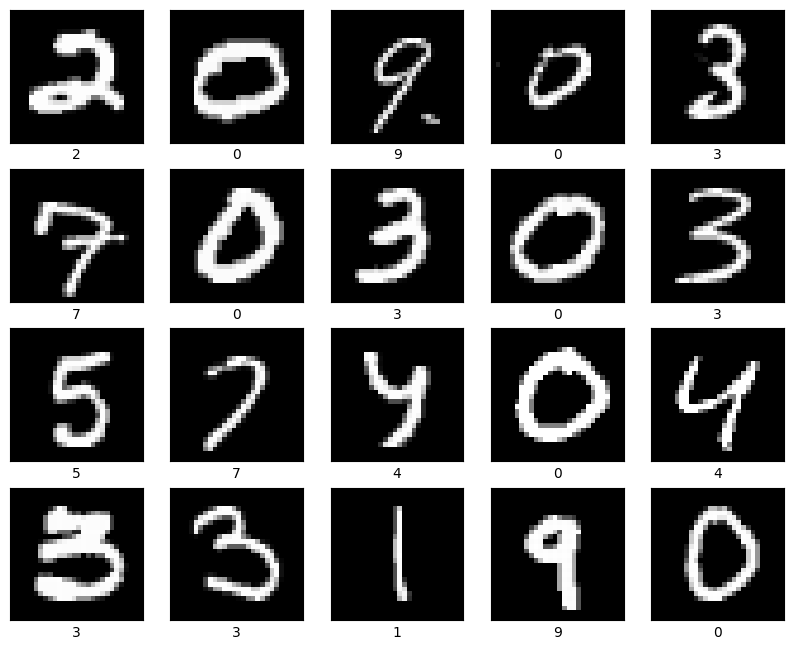

In [28]:
# Visualize the images in the train dataframe
plt.figure(figsize=(10, 10))
for i in range(20):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_test[i], cmap="grey")
    plt.xlabel(str(np.argmax(predictions[i])))
    plt.xticks([])
    plt.yticks([])
plt.show()

### Submitting the predictions to Kaggle
### Prediction accuracy
We got a 97,65% accuracy. The model sligtli improved for 0.30%

Note: Can we do better?

In [29]:
prediction_int = [int(np.argmax(pred)) for pred in predictions]
img_id = np.arange(1, len(prediction_int)+1)
submission = pd.DataFrame({'ImageId': img_id, 'Label': prediction_int})
submission.to_csv('/content/drive/MyDrive/Digit Recognizer/submissionV2.csv', index=False)

## Data augmentation

we'll try to improve our model by using data augmentation whit the keras layers.

In [3]:
# Seting the augmentation layers
data_augmentation = tf_keras.Sequential([
    tf_keras.layers.Rescaling(1./255),
    tf_keras.layers.RandomZoom(0.2, fill_mode="nearest"),
    tf_keras.layers.RandomRotation(0.2),
])

In [4]:
# Load the data
train_df = pd.read_csv("/content/drive/MyDrive/Digit Recognizer/train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Digit Recognizer/test.csv")

In [5]:
X_train = train_df.drop('label', axis=1)
y_train = train_df['label']

In [6]:
# Creating a functio
def prepare_and_augment(images, labels):
    images = images.values.reshape(-1, 28, 28, 1)
    augmented = data_augmentation(images)

    return images, labels, augmented, labels


    # Prepare the data
X_train, y_train, X_augmented, y_augmented = prepare_and_augment(X_train, y_train)

X_train = np.concatenate([X_train, X_augmented])
y_train = np.concatenate([y_train, y_augmented])

In [7]:
# Retrain the model
hypermodel.fit(X_train, y_train, epochs=35, validation_split=0.2)

Epoch 1/35
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6636 - loss: 5.7675 - val_accuracy: 0.5379 - val_loss: 1.8091
Epoch 2/35
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.7562 - loss: 0.9812 - val_accuracy: 0.6083 - val_loss: 1.4602
Epoch 3/35
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.7989 - loss: 0.7858 - val_accuracy: 0.6681 - val_loss: 1.1664
Epoch 4/35
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8255 - loss: 0.6952 - val_accuracy: 0.7120 - val_loss: 1.0062
Epoch 5/35
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8500 - loss: 0.6112 - val_accuracy: 0.7365 - val_loss: 0.8818
Epoch 6/35
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8649 - loss: 0.5252 - val_accuracy: 0.7633 - val_loss: 0.7971
Epoch 7/35
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8742 - loss: 0.5158 - val_accuracy: 0.7834 - val_loss: 0.7334
Epoch 8/35
2100/2100 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.8839 - loss: 0.

In [9]:
test_df = test_df/255
test_df = test_df.values.reshape(-1, 28, 28, 1)

In [11]:
probability_model = tf_keras.Sequential([hypermodel, tf_keras.layers.Softmax()])
predictions = probability_model.predict(test_df)

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [13]:
submission("submissionV5")